In [115]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#Upload file
from google.colab import files
uploaded = files.upload()

Saving lobster_23.csv to lobster_23.csv


In [55]:
lob = pd.read_csv("lobster_23.csv")

In [43]:
#1A
lob.head()

,Date,weekday,high_temp,precip_total,unique_visitors,gold_zone_rev,park_merch_rev,online_merch_rev,lobsterama_rev,lost_found_items,first_aid_incidents,operational_status,staff_hours,total_rev,sign_ups24,merch_promo
0,2023-05-29,Mon,71,0.00,5448,9623,6028,39,9665,9,1,95.4,2042.83,193414.58,61.0,0
1,2023-05-30,Tue,66,0.00,3977,6462,2461,550,7368,2,6,93.3,1223.69,111946.06,76.0,0
2,2023-05-31,Wed,71,0.00,4634,5495,2825,1188,6991,3,3,86.6,1425.85,130465.64,92.0,0
3,2023-06-01,Thu,84,0.02,3012,10683,2379,1184,7803,4,4,90.8,976.80,105386.53,67.0,1
4,2023-06-02,Fri,85,0.09,5741,8932,4242,187,10173,7,3,86.2,1461.38,172071.35,93.0,0


1B. \\
There are 5 rows.

In [36]:
print(lob.shape)

(99, 16)


1C. \\
There are 99 rows and 16 columns.

In [42]:
lob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 99 non-null     object 
 1   weekday              99 non-null     object 
 2   high_temp            99 non-null     int64  
 3   precip_total         99 non-null     object 
 4   unique_visitors      99 non-null     int64  
 5   gold_zone_rev        99 non-null     int64  
 6   park_merch_rev       99 non-null     int64  
 7   online_merch_rev     99 non-null     int64  
 8   lobsterama_rev       99 non-null     int64  
 9   lost_found_items     99 non-null     int64  
 10  first_aid_incidents  99 non-null     int64  
 11  operational_status   94 non-null     float64
 12  staff_hours          96 non-null     float64
 13  total_rev            99 non-null     float64
 14  sign_ups24           99 non-null     float64
 15  merch_promo          99 non-null     int64

1D. \\
Bases on the information the dataset provided, "Date", "weekday" and "precip_total" are categorical variables.
 \\
Others are numeric variables.


In [56]:
lob['precip_total'] = lob['precip_total'].replace('T', '0.00')
lob['precip_total'] = pd.to_numeric(lob['precip_total'])
print(lob['precip_total'])

0     0.00
1     0.00
2     0.00
3     0.00
4     0.09
      ... 
94    0.00
95    0.00
96    0.00
97    0.00
98    0.00
Name: precip_total, Length: 99, dtype: float64


1E. \\
The T means that the rainfall exists on that day but the amount is too small to be counted. As such, I would use 0.00 to replace "T" in this column.

1F.

In [94]:
#a
lob['is_weekend'] = lob['weekday'].isin(['Fri', 'Sat', 'Sun'])
#b
lob['very_rainy'] = lob['precip_total'] >= 1.0
#c
temp = lob['first_aid_incidents']
lob['first_aid_incidents'] = lob['lost_found_items']
lob['lost_found_items'] = temp

lob. head()

,Date,weekday,high_temp,precip_total,unique_visitors,gold_zone_rev,park_merch_rev,online_merch_rev,lobsterama_rev,lost_found_items,first_aid_incidents,operational_status,staff_hours,total_rev,sign_ups24,merch_promo,is_weekend,very_rainy
0,2023-05-29,Mon,71,0.00,5448,9623,6028,39,9665,9,1,95.4,2042.83,193414.58,61.0,0,False,False
1,2023-05-30,Tue,66,0.00,3977,6462,2461,550,7368,2,6,93.3,1223.69,111946.06,76.0,0,False,False
2,2023-05-31,Wed,71,0.00,4634,5495,2825,1188,6991,3,3,86.6,1425.85,130465.64,92.0,0,False,False
3,2023-06-01,Thu,84,0.00,3012,10683,2379,1184,7803,4,4,90.8,976.80,105386.53,67.0,1,False,False
4,2023-06-02,Fri,85,0.09,5741,8932,4242,187,10173,7,3,86.2,1461.38,172071.35,93.0,0,True,False


1G.

In [64]:
#a
total_rev = lob['total_rev']. sum()
total_rev

13347279.580000002

In [83]:
## b
## Avg Lobsterama Spending on very rainy days vs not very rainy days
avg_very_rainy = lob[lob['very_rainy']]['lobsterama_rev'].mean()
avg_not_rainy = lob[~lob['very_rainy']]['lobsterama_rev'].mean()
print(f"Average very rainy for Lobsterama spending: {avg_very_rainy}")
print(f"Average not very rainy for Lobsterama spending: {round(avg_not_rainy,1)}")
## Avg park merchandise spending on very rainy days vs not very rainy days

avg_park_v = lob[lob['very_rainy']]['park_merch_rev'].mean()
avg_park_n = lob[~lob['very_rainy']]['park_merch_rev'].mean()
print(f"Average very rainy for park merchandise: {avg_park_v}")
print(f"Average not very rainy for park merchandise: {round(avg_park_n,1)}")
## Calculate diff of these metrics
diff_lob_ama = (avg_not_rainy - avg_very_rainy) / avg_not_rainy
diff_park_merch = (avg_park_n - avg_park_v) / avg_park_n
print(f"Relative Diff between Avg Lobsterama: {round(diff_lob_ama,3)}")
print(f"Relative Diff between Avg Park merch: {round(diff_park_merch,3)}")


Average very rainy for Lobsterama spending: 6262.2
Average not very rainy for Lobsterama spending: 8045.3
Average very rainy for park merchandise: 2585.4
Average not very rainy for park merchandise: 3578.5
Relative Diff between Avg Lobsterama: 0.222
Relative Diff between Avg Park merch: 0.278


When we look at the relative differences, the spending is higher on not very rainy days than very rainy days for both lobsterama and park merchandise spendings. It could be that people tend to spend money on non-rainy days or they prefer indoor activities on rainy days.

In [81]:
#c
cor = lob['high_temp'].corr(lob['lost_found_items'])
print(f"Correlation between high temperature and lost&found items",round(cor,3))

Correlation between high temperature and lost&found items 0.083


The value is positive but it only indicates a very small positive correlation between high temperature and lost&found items. If the temperature increases, more items will be lost.

1H. \\


In [99]:
#a
sd_gold_zone = lob['gold_zone_rev']. std()
sd_total_rev = lob['total_rev']. std()
print(f"standard deviation gold zone",round(sd_gold_zone,3))
print(f"standard deviation total revenue",round(sd_total_rev,3))

standard deviation gold zone 1978.532
standard deviation total revenue 30949.331


In [100]:
#b
mean_gold_zone = lob['gold_zone_rev']. mean()
mean_total_rev = lob['total_rev']. mean()
print(f"mean gold zone",round(mean_gold_zone,3))
print(f"mean total revenue",round(mean_total_rev,3))

mean gold zone 7952.646
mean total revenue 134821.006


The standard deviation tells how spread the data are corresponding to the average and it can disguise some of the truth. As some of the dataset could contain one or two extremely larege/small outliers whereas other values are centered.

In [101]:
#c
cv_gold_zone = sd_gold_zone / mean_gold_zone
cv_total_rev = sd_total_rev / mean_total_rev
print(f"cv gold zone",round(cv_gold_zone,3))
print(f"cv total revenue",round(cv_total_rev,3))

cv gold zone 0.249
cv total revenue 0.23


The coefficient of variation could tell how variabe the dataset is regarding to its mean. Even the standard deviations are large in differences, but cv values of these two are pretty close.

1I. \\
There are 8 missing values in total (from operatioinal_status and staff_hours columns)

In [104]:
miss = lob. isnull(). sum()
print(miss)

Date                   0
weekday                0
high_temp              0
precip_total           0
unique_visitors        0
gold_zone_rev          0
park_merch_rev         0
online_merch_rev       0
lobsterama_rev         0
lost_found_items       0
first_aid_incidents    0
operational_status     5
staff_hours            3
total_rev              0
sign_ups24             0
merch_promo            0
is_weekend             0
very_rainy             0
dtype: int64


I would say we can leave naN if the dataset contains it because that's the data we originally collected. We cannot expect every dataset is perfect. Sometimes we have to deal with such missing values. If we remove or edit naN to the original dataset, the result might be different.

1J.

In [105]:
lob.rename(columns={'is_weekend': 'weekend_flag'}, inplace=True)

IIk.

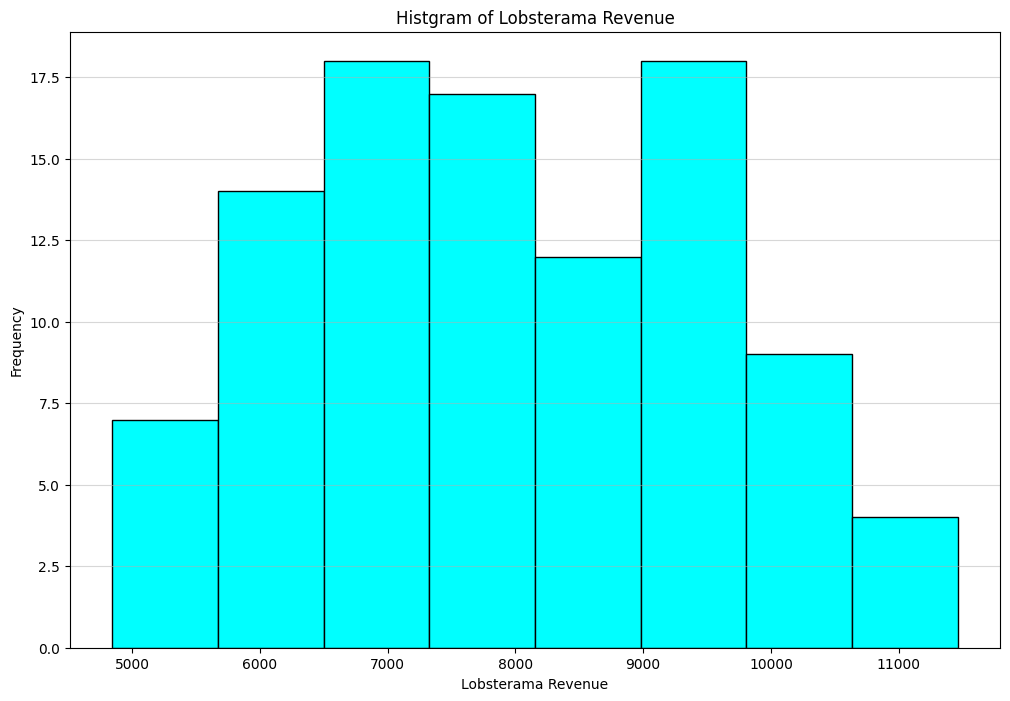

In [112]:
import matplotlib.pyplot as plt

#a
plt.figure(figsize=(12, 8))
plt.hist(lob['lobsterama_rev'], bins=8, color='cyan', edgecolor='black')
plt.title('Histgram of Lobsterama Revenue')
plt.xlabel('Lobsterama Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

The plot is hard to tell the shape but I would consider it as a bell-shape from my perspective. The frequency is relatively high when the revenue reaches 7000-8000, but decreases when revenue is above 10000.

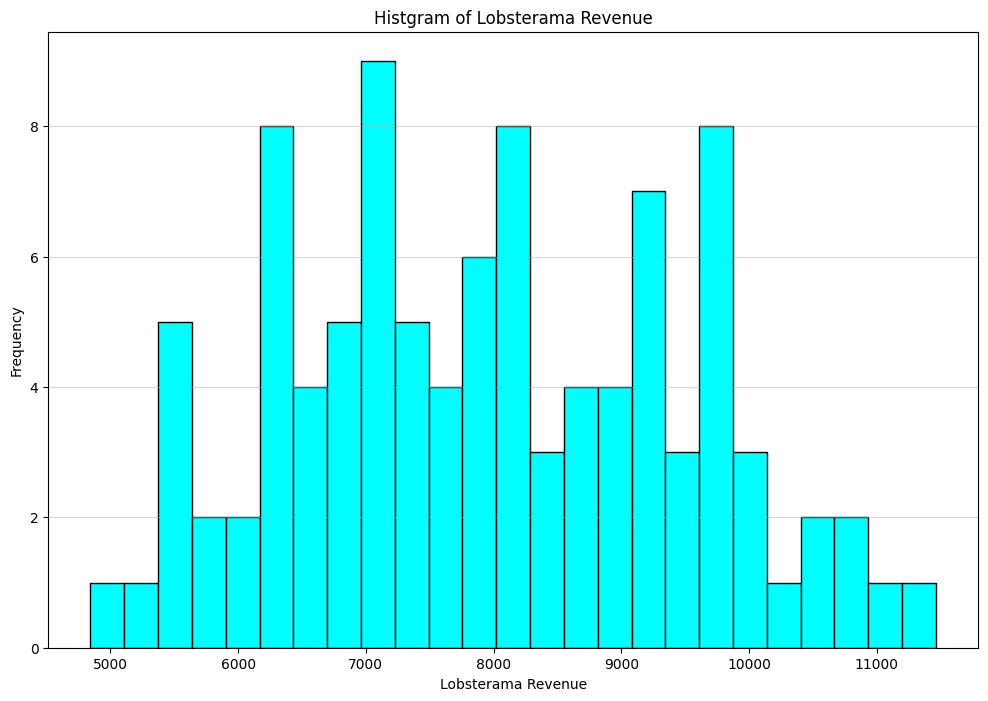

In [111]:
#b
plt.figure(figsize=(12, 8))
plt.hist(lob['lobsterama_rev'],bins=25, color='cyan', edgecolor='black')
plt.title('Histgram of Lobsterama Revenue')
plt.xlabel('Lobsterama Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

As the number of bins increase, I realize that the shape it shows is not what I initially thought. There are more local peaks in this plot.

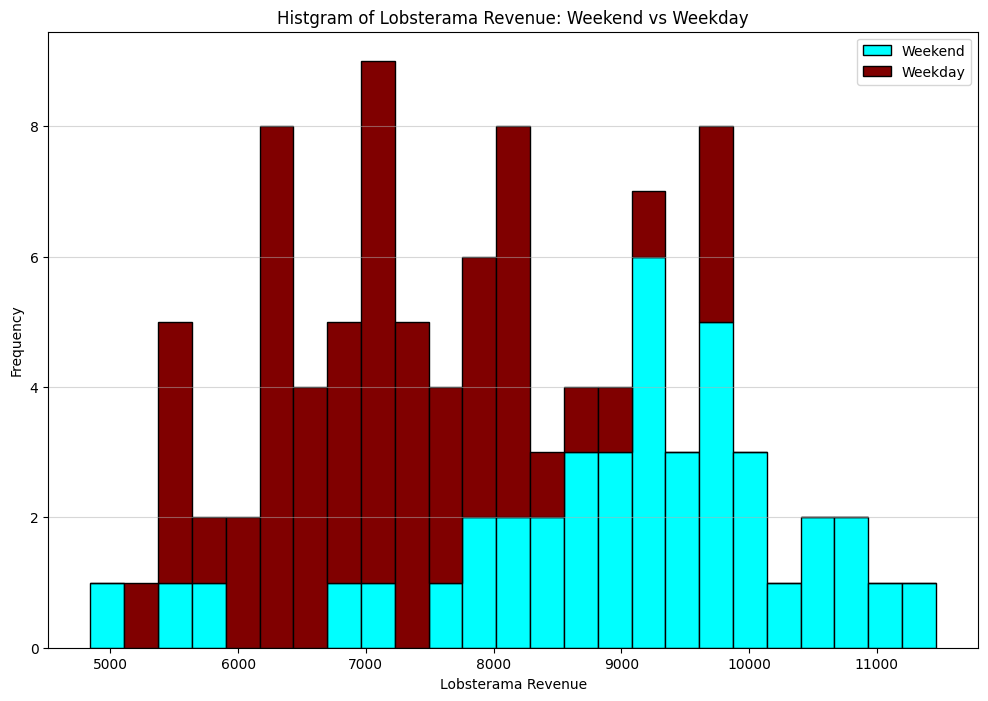

In [113]:
#c
plt. figure(figsize= (12, 8))
plt. hist([lob[lob['weekend_flag']]['lobsterama_rev'],
lob[~ lob['weekend_flag']]['lobsterama_rev']],
bins= 25, color= ['cyan', 'maroon'], edgecolor= 'black',
          label=['Weekend', 'Weekday'],
          stacked=True)
plt. title('Histgram of Lobsterama Revenue: Weekend vs Weekday')
plt. xlabel('Lobsterama Revenue')
plt. ylabel('Frequency')
plt. legend()
plt. grid(axis= 'y', alpha= 0.5)
plt. show()

As can be seen, the revenue is higher on weekends than weekdays. That could probably indicate that people generally have more time to enjoy their lives and spend on lobsterama at weekends.

IIL.

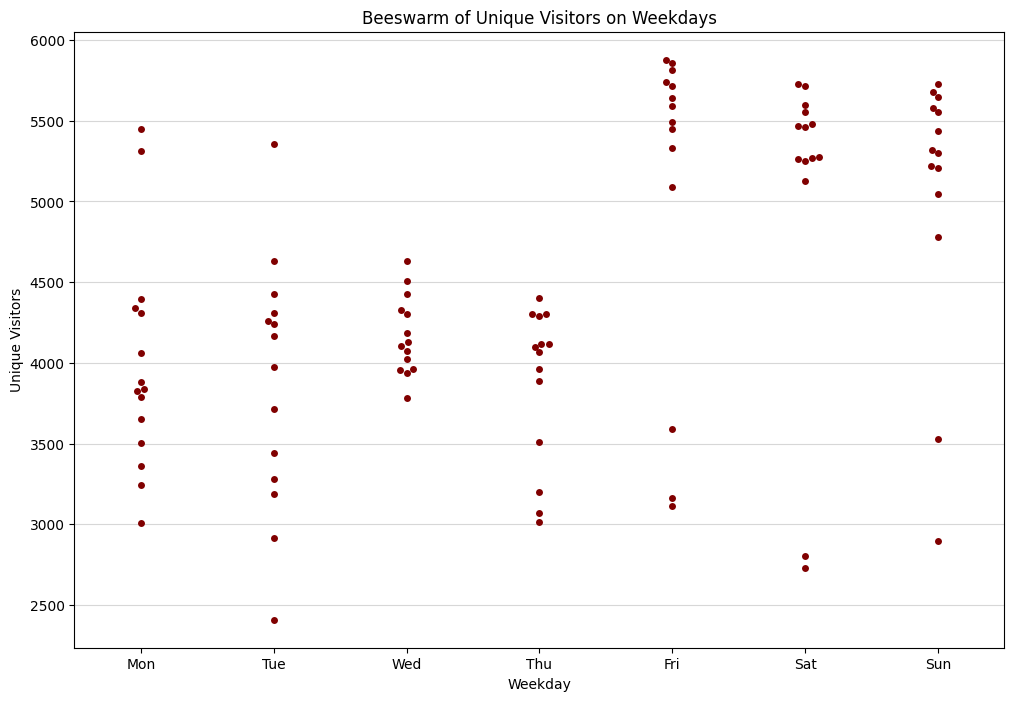

In [119]:
#a
plt. figure(figsize= (12, 8))
sns. swarmplot(x= 'weekday', y= 'unique_visitors', data= lob,
               order= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
               color = "maroon")
plt. title('Beeswarm of Unique Visitors on Weekdays')
plt. xlabel('Weekday')
plt. ylabel('Unique Visitors')
plt. grid(axis= 'y', alpha= 0.5)
plt. show()

It shows a plot of how the number of unique vistors are associated with each day whereas there are no obvious overlaps between each dot. As can be seen, weekends tend to have a higher number of unique vistors than weekdays.

In [124]:
#b
busy = lob[lob['weekday'].isin(['Mon', 'Tue'])].nlargest(3, 'unique_visitors')
busy['Date']

0     2023-05-29
36    2023-07-04
98    2023-09-04
Name: Date, dtype: object

If we look at the date three busy days carefully, these are the american holidays and people usually do not go to work on holidays. Thus the visitor numbers are high on these days.

IIM.

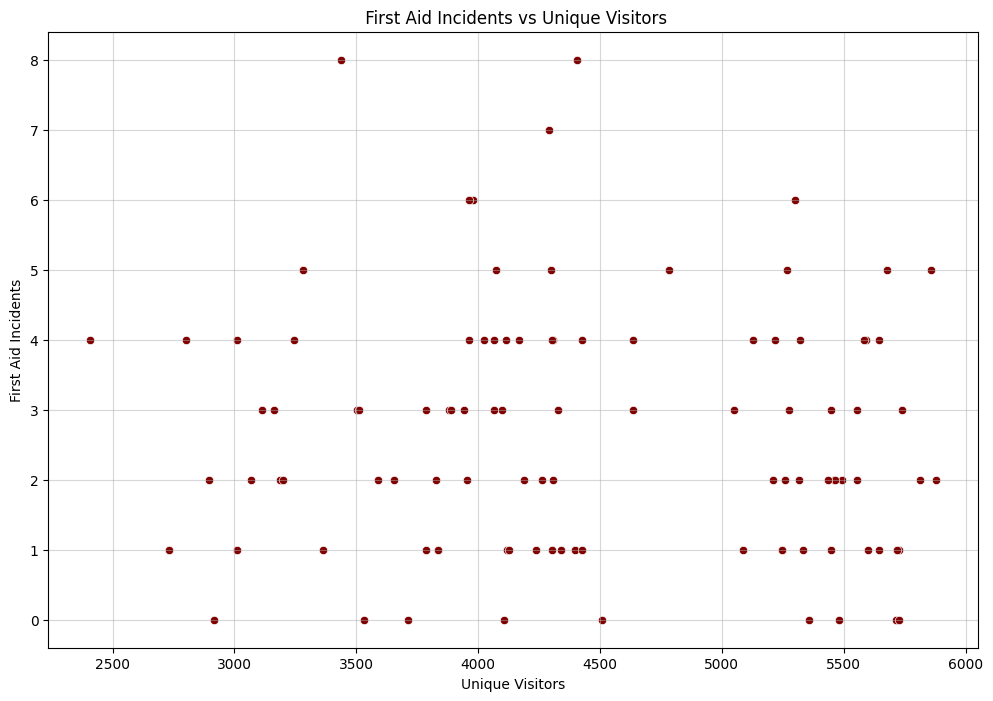

In [128]:
plt. figure(figsize= (12, 8))
sns. scatterplot(x= 'unique_visitors', y= 'first_aid_incidents', data= lob,
                 color = "maroon")
plt. title(' First Aid Incidents vs Unique Visitors')
plt. xlabel('Unique Visitors')
plt. ylabel('First Aid Incidents')
plt. grid(axis= 'both', alpha= 0.5)
plt. show()

This plot shows the relationship between unique vistors and first aid incidents and it has a positive trend, which means as the number of unique vistors increases, the first aid incidents increase.

IIN.

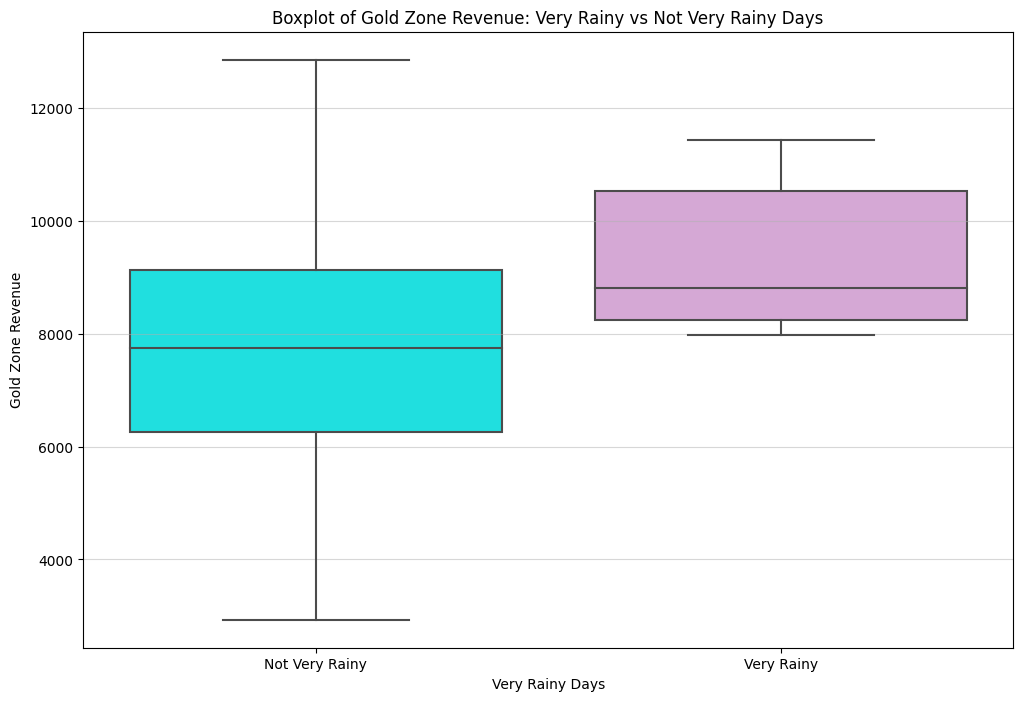

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='very_rainy', y='gold_zone_rev', data=lob,
            palette=["cyan", "plum"])
plt.title('Boxplot of Gold Zone Revenue: Very Rainy vs Not Very Rainy Days')
plt.xlabel('Very Rainy Days')
plt.ylabel('Gold Zone Revenue')
plt.grid(axis='y', alpha=0.5)
plt.xticks([0, 1], ['Not Very Rainy', 'Very Rainy'])
plt.show()


We can compare the median line and the length of boxes. From this plot, the medians(the middle black line) are different. The very rainy days has a higher revenue value(higher median) than not very rainy days. Additionally the whole box is more compact for very rainy days and that indicates a lower spread of data distribution.

IIO.

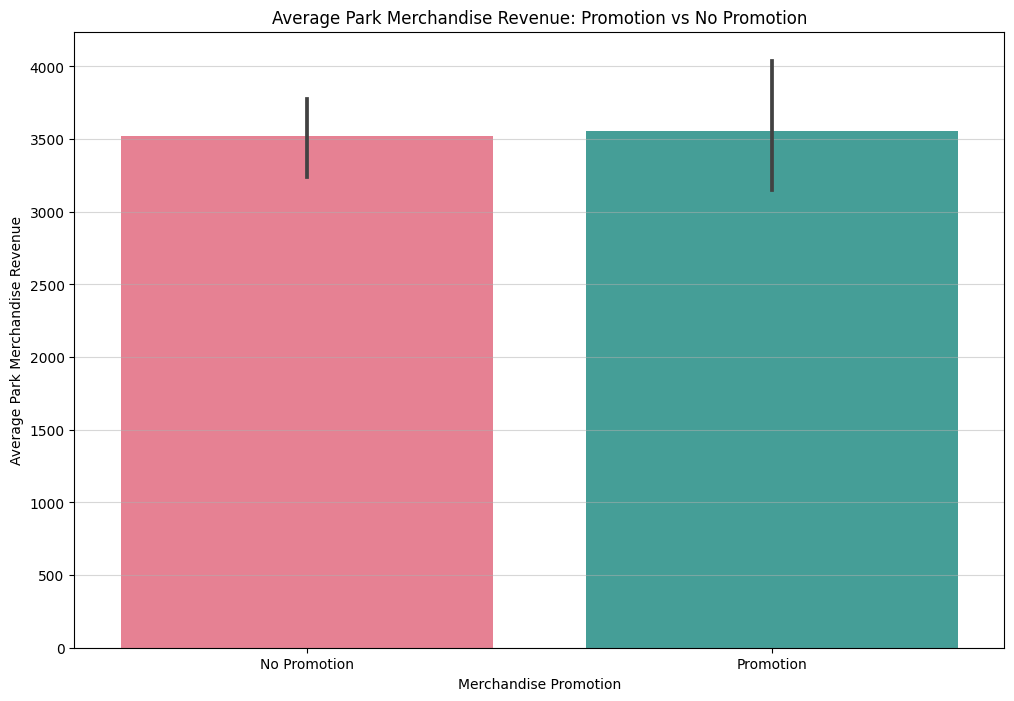

In [147]:
plt.figure(figsize=(12, 8))
sns.barplot(x='merch_promo', y='park_merch_rev', data=lob, palette='husl')
plt.title('Average Park Merchandise Revenue: Promotion vs No Promotion')
plt.xlabel('Merchandise Promotion')
plt.ylabel('Average Park Merchandise Revenue')
plt.grid(axis='y', alpha=0.5)
plt.xticks([0, 1], ['No Promotion', 'Promotion'])
plt.show()

It is hard to tell if a promotion influence the average park merchandise revenue as the each bar looks close in values.

IIP.

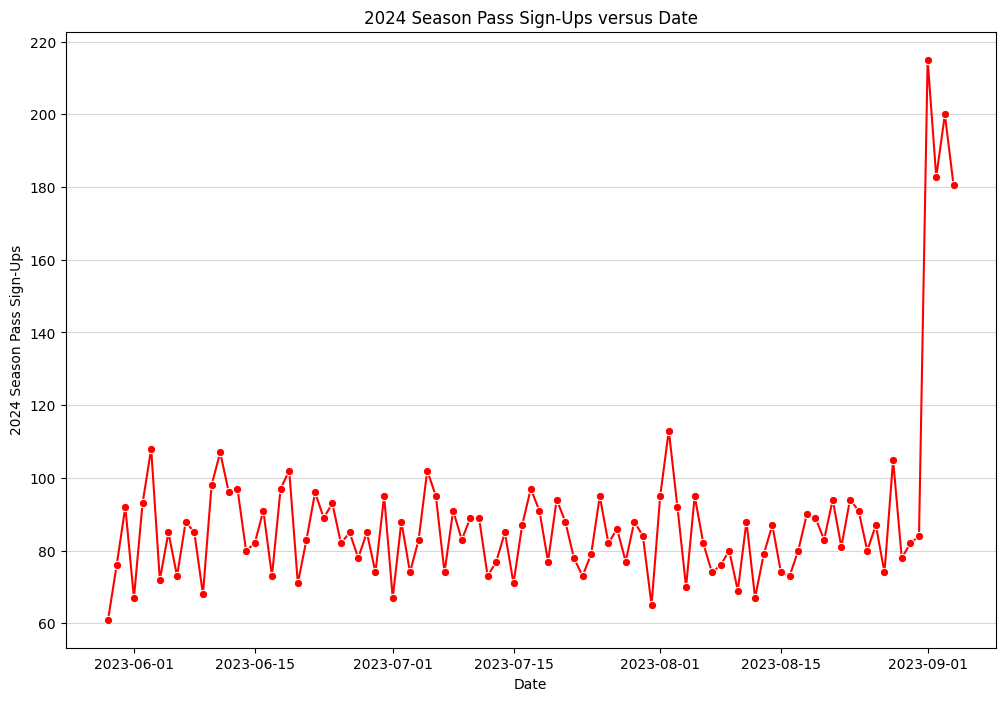

In [155]:
lob['Date'] = pd.to_datetime(lob['Date'])

plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='sign_ups24', data=lob, color='red', marker='o')
plt.title('2024 Season Pass Sign-Ups versus Date')
plt.xlabel('Date')
plt.ylabel('2024 Season Pass Sign-Ups')
plt.grid(axis='y', alpha=0.5)
plt.show()

There is an obvious peak around 2023 Sep 1st as the number of sign-ups increase to 220, whereas other dates have stable sign-up numbers within a range from 60 to 120.

#Part III

## Number of MLB baseball highlights that I watched on youtube

Day1: 10 \\
Day2: 5 \\
Day3: 2 \\

I began tracking the baseball highlights I watched on YouTube starting this Friday. On any day of this weekend, there are more than 10 matches. I'm a fan of both the Blue Jays and the Red Sox. However, given the recent poor performance of the Red Sox, I was rooting particularly hard for them. They were up against the White Sox this weekend, and I genuinely believed it would be an easy victory for the Red Sox. To my delight, both the Red Sox and the Blue Jays clinched victories on Friday. Consequently, I ended up watching highlights from several other games.

However, my mood took a hit on Saturday when the Red Sox lost to the White Sox (white sox was really bad this season). I didn't see that coming, and it felt like they were having a tough time. Thus I only watched a few highlights. Then on Sunday, they slipped up again and made me really angry. I checked out the Red Sox standings for this season and saw they were at the bottom and will be at the bottom till the season ends. As a result, I only ended up watching two highlights that day.

Thus, I would conclude that my personal mood can determine how many highlights I watch as long as I am a fan of red sox. I could extend this experiment until this season ends and next seasons to make the result more accurate.